In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
import tensorflow as tf
from sklearn.model_selection import train_test_split

if tf.test.is_gpu_available():
    print("yes")
else:
    print("no")


path_save_files = "C:\\Users\\night\\Desktop\\Facultate An 3\\Thesis\\EXPERIMENTS\\Model 1\\"


Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
no


In [ ]:
path = "C:\\Users\\night\\Desktop\\Facultate An 3\\Thesis\\Datasets\\Used datasets\\"

predict_paths = []
predict_labels = []
for dirname, _, filenames in os.walk(path + 'savee'):
    for filename in filenames:
        label = filename.split('.')[0]
        label = list(label)

        if label[0] != "n":
            predict_paths.append(os.path.join(dirname, filename))


        if label[0] == 'a':
            predict_labels.append("anger")
        elif label[0] == 'd':
            predict_labels.append("disgust")
        elif label[0] == 'f':
            predict_labels.append("fear")
        elif label[0] == "h":
            predict_labels.append("happiness")
        elif label[0] == "s" and label[1] == "a":
            predict_labels.append("sadness")
        elif label[0] == "s" and label[1] == "u":
            predict_labels.append("surprised")

print('Savee Dataset is loaded')

In [2]:
path = "C:\\Users\\night\\Desktop\\Facultate An 3\\Thesis\\Datasets\\Used datasets\\"

train_paths = []
train_labels = []
for dirname, _, filenames in os.walk(path + 'tess'):
    for filename in filenames:
        label = filename.split('_')[-1]
        label = label.split('.')[0]

        if label != "neutral" and label != "ps":
            train_paths.append(os.path.join(dirname, filename))

        if label == "angry":
            train_labels.append("anger")
        elif label == "disgust":
            train_labels.append("disgust")
        elif label == "fear":
            train_labels.append("fear")
        elif label == "happy":
            train_labels.append("happiness")
        elif label == "sad":
            train_labels.append("sadness")
        # train_labels.append(label.lower())

print('TESS Toronto Dataset is loaded')

TESS Toronto Dataset is loaded


In [ ]:
path = "C:\\Users\\night\\Desktop\\Facultate An 3\\Thesis\\Datasets\\Used datasets\\"
#
# train_paths = []
# train_labels = []
intensity = []
for dirname, _, filenames in os.walk(path + 'ravdess'):
    for filename in filenames:

        label = filename.split('-')
        emotion_label = label[2]
        intensity_label = label[3]
        if emotion_label != "01" and emotion_label != "02" and emotion_label != "08":
            train_paths.append(os.path.join(dirname, filename))


        if emotion_label == "03":
            train_labels.append("happiness")
        elif emotion_label == "05":
            train_labels.append("anger")
        elif emotion_label == "07":
            train_labels.append("disgust")
        elif emotion_label == "06":
            train_labels.append("fear")
        elif emotion_label == "04":
            train_labels.append("sadness")


print('RAVDESS Dataset is loaded')

In [ ]:
path = "C:\\Users\\night\\Desktop\\Facultate An 3\\Thesis\\Datasets\\Used datasets\\"

# train_paths = []
# train_labels = []
# intensity = []
for dirname, _, filenames in os.walk(path + "crema-d"):
    for filename in filenames:

        label = filename.split('_')

        if label[2] != "NEU":
            train_paths.append(os.path.join(dirname, filename))

        if label[2] == "HAP":
            train_labels.append("happiness")
        elif label[2] == "ANG":
            train_labels.append("anger")
        elif label[2] == "DIS":
            train_labels.append("disgust")
        elif label[2] == "FEA":
            train_labels.append("fear")
        elif label[2] == "SAD":
            train_labels.append("sadness")


print('CREMA-D  Dataset is loaded')

In [3]:
train_paths[:10]

['C:\\Users\\night\\Desktop\\Facultate An 3\\Thesis\\Datasets\\Used datasets\\tess\\OAF_angry\\OAF_back_angry.wav',
 'C:\\Users\\night\\Desktop\\Facultate An 3\\Thesis\\Datasets\\Used datasets\\tess\\OAF_angry\\OAF_bar_angry.wav',
 'C:\\Users\\night\\Desktop\\Facultate An 3\\Thesis\\Datasets\\Used datasets\\tess\\OAF_angry\\OAF_base_angry.wav',
 'C:\\Users\\night\\Desktop\\Facultate An 3\\Thesis\\Datasets\\Used datasets\\tess\\OAF_angry\\OAF_bath_angry.wav',
 'C:\\Users\\night\\Desktop\\Facultate An 3\\Thesis\\Datasets\\Used datasets\\tess\\OAF_angry\\OAF_bean_angry.wav',
 'C:\\Users\\night\\Desktop\\Facultate An 3\\Thesis\\Datasets\\Used datasets\\tess\\OAF_angry\\OAF_beg_angry.wav',
 'C:\\Users\\night\\Desktop\\Facultate An 3\\Thesis\\Datasets\\Used datasets\\tess\\OAF_angry\\OAF_bite_angry.wav',
 'C:\\Users\\night\\Desktop\\Facultate An 3\\Thesis\\Datasets\\Used datasets\\tess\\OAF_angry\\OAF_boat_angry.wav',
 'C:\\Users\\night\\Desktop\\Facultate An 3\\Thesis\\Datasets\\Used datase

In [4]:
train_labels[:10]

['anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger',
 'anger']

In [5]:
# Create a dataframe for the train data
df_train = pd.DataFrame()
df_train['speech'] = train_paths
df_train['label'] = train_labels
df_train.head()
df_train.to_csv(path_save_files + 'data.csv', index=False)

In [6]:
df_train['label'].value_counts()

label
anger        400
disgust      400
fear         400
happiness    400
sadness      400
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

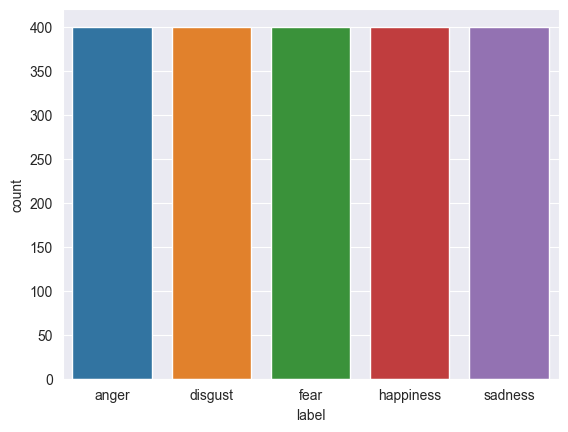

In [7]:
sns.countplot(df_train, x='label')